In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
df = pd.read_csv('/content/aerofit_treadmill.csv')

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


#Importing, checking characteristics and structure of the Dataset

In [ ]:
#Datatype of all columns in the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
#Number of rows and columns
df.shape

(180, 9)

Insights:
- The data contains 180 rows and 9 columns

In [ ]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
#Creating a list of continuous and categorical
continuous_columns = ['Age',	'Education',	'Usage',	'Fitness',	'Income',	'Miles']
categorical_columns = ['Product',	'Gender',	'MaritalStatus']

#Detecting Outliers

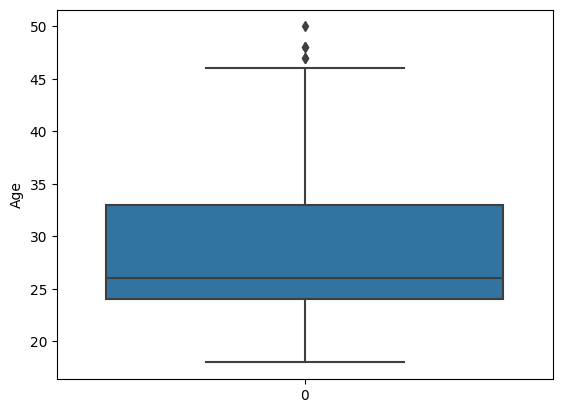

In [ ]:
#Boxplot for Age
sns.boxplot(df['Age'])
plt.ylabel('Age')
plt.show()

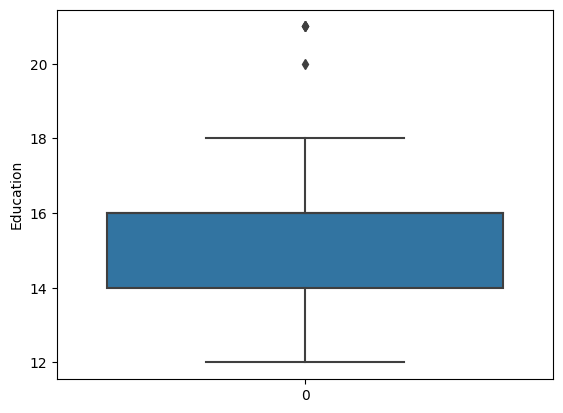

In [ ]:
#Boxplot for Education
sns.boxplot(df['Education'])
plt.ylabel('Education')
plt.show()

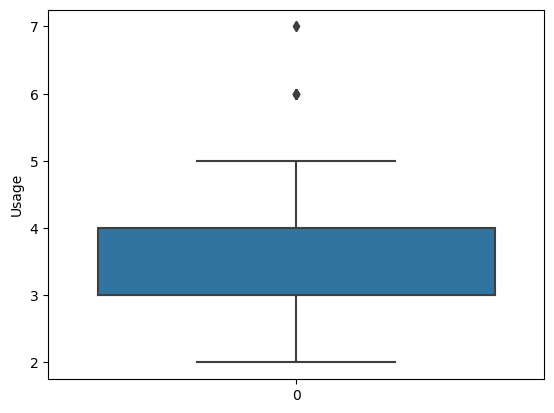

In [ ]:
#Boxplot for Usage
sns.boxplot(df['Usage'])
plt.ylabel('Usage')
plt.show()

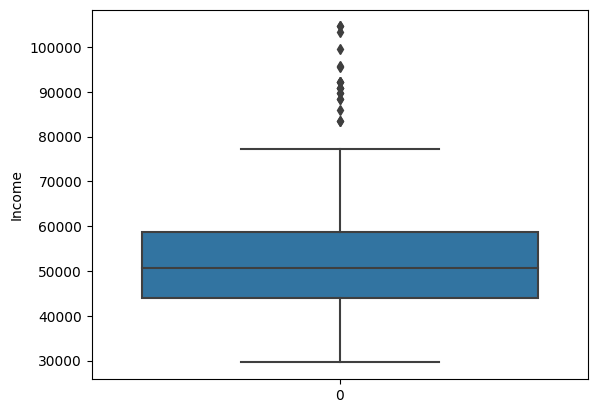

In [ ]:
#Boxplot for Income level
sns.boxplot(df['Income'])
plt.ylabel('Income')
plt.show()

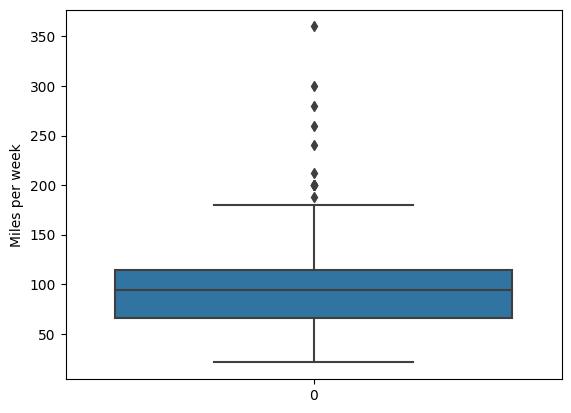

In [ ]:
#Boxplot for avg number of miles customer expects to walk/run per week
sns.boxplot(df['Miles'])
plt.ylabel('Miles per week')
plt.show()

Computing 5th and 95th percentiles for all the numerical columns

In [ ]:
#Clipping Age column
fifth_percentile_age = np.percentile(df['Age'],5)
nintyfifth_percentile_age = np.percentile(df['Age'],95)
df['Age'] =np.clip(df['Age'],fifth_percentile_age,nintyfifth_percentile_age)

In [ ]:
#Clipping Education Column
fifth_percentile_edu = np.percentile(df['Education'],5)
nintyfifth_percentile_edu = np.percentile(df['Education'],95)
df['Education'] =np.clip(df['Education'],fifth_percentile_edu,nintyfifth_percentile_edu)

In [ ]:
#Clipping income Column
fifth_percentile_income = np.percentile(df['Income'],5)
nintyfifth_percentile_income = np.percentile(df['Income'],95)
df['Income'] =np.clip(df['Income'],fifth_percentile_income,nintyfifth_percentile_income)

In [ ]:
#Clipping Miles Column
fifth_percentile_miles = np.percentile(df['Miles'],5)
nintyfifth_percentile_miles = np.percentile(df['Miles'],95)
df['Miles'] =np.clip(df['Miles'],fifth_percentile_miles,nintyfifth_percentile_miles)

#Relationship between categorical and numerical variables

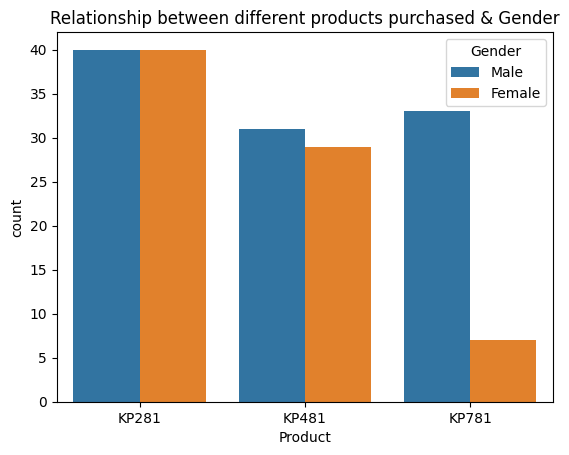

In [ ]:
sns.countplot(data=df,x='Product',hue='Gender')
plt.title('Relationship between different products purchased & Gender')
plt.show()

Insights:


1.   Most of the Male users prefer KP781, however for KP281 and KP481 the preference is same amoung both the genders.
2. KP281 being a bigger treadmill has the highest purchase count.



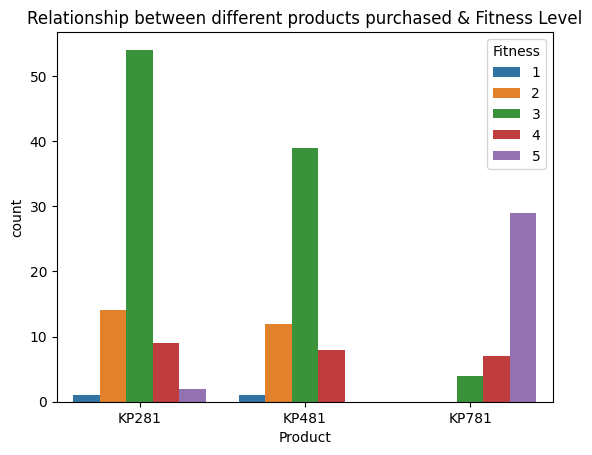

In [ ]:
sns.countplot(data=df,x='Product',hue='Fitness')
plt.title('Relationship between different products purchased & Fitness Level')
plt.show()

Insights:


1.   People with with excellent shape prefer the most advanced treadmill that
is KP781.
2. People in average shape prefer the KP281 and KP481.



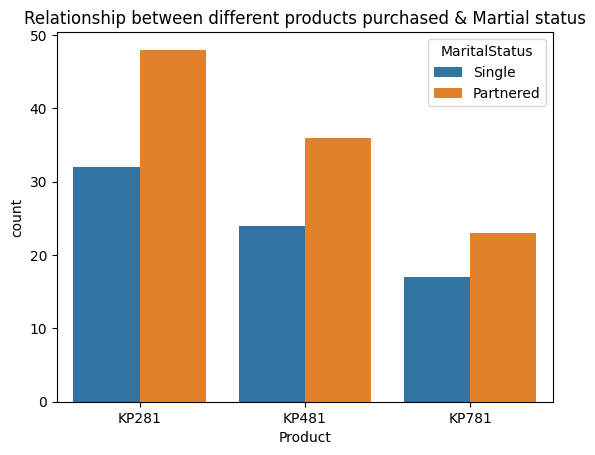

In [ ]:
sns.countplot(data=df,x='Product',hue='MaritalStatus')
plt.title('Relationship between different products purchased & Martial status')
plt.show()

Insights:


*   Married people tend to purchase more treadmills / fitness in general as compared to their single counterparts.
*   This could be because having a workout partner motivates an individual to exercise more.



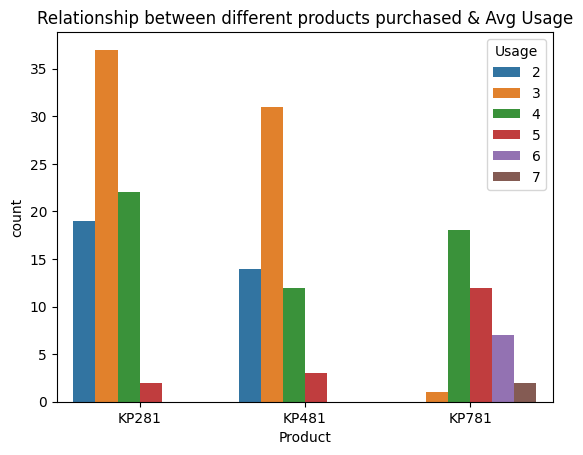

In [ ]:
sns.countplot(data=df,x='Product',hue='Usage')
plt.title('Relationship between different products purchased & Avg Usage')
plt.show()

Insights:


*   People with less than or equal to 4 days per week of usage on average perfer the KP281 and KP481.
*   People with more than 4 days per week on avg prefer the advance treadmill that is KP781.



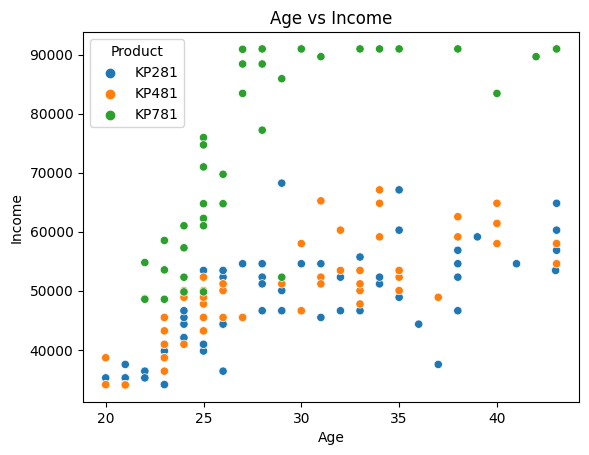

In [ ]:
sns.scatterplot(x='Age',y='Income',data=df,hue='Product')
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

Insights:


*   As the age increases income increases
*   People who have a higher income prefer the more advance treadmill that is KP781.
* People in the income bracket of 40k to 70k prefer the beginner and intermediate treadmills
* People below the age of 30 prefer the advance treadmil more.



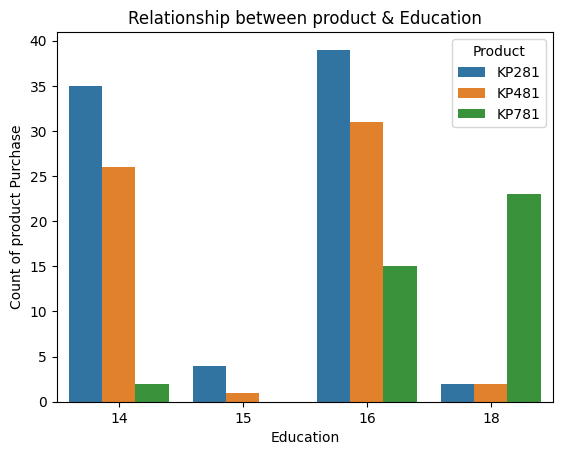

In [ ]:
sns.countplot(x='Education',data=df,hue='Product')
plt.title('Relationship between product & Education')
plt.xlabel('Education')
plt.ylabel('Count of product Purchase')
plt.show()

Insights:


*   People with 18 years of education prefer the Kp781 treadmill
*   People below 18 years of experience prefer the beginner and intermediate treadmills.




#Representing the Probability

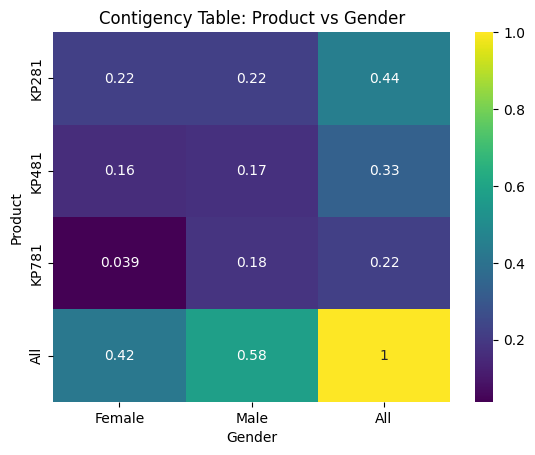

In [ ]:
contigency_table_gender = pd.crosstab(index=df['Product'],columns=df['Gender'],margins=True,normalize=True)
sns.heatmap(contigency_table_gender,annot=True,cmap='viridis')
plt.title('Contigency Table: Product vs Gender')
plt.show()

Marginal Probabilities:

*   The probabilty of a customer will purchase KP281 is 44%
*   The probabilty of a customer will purchase KP281 is 33%
* The probabilty of a customer will purchase KP281 is 22%



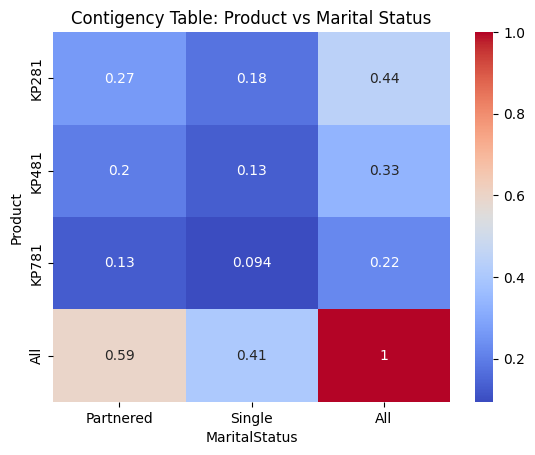

In [ ]:
contigency_table_maritalstatus = pd.crosstab(index=df['Product'],columns=df['MaritalStatus'],margins=True,normalize=True)
sns.heatmap(contigency_table_maritalstatus,annot=True,cmap='coolwarm')
plt.title('Contigency Table: Product vs Marital Status')
plt.show()

Insights:

* The probabilty of a married person buying a product is 59%
* The probabilty of a single person buying a product is 41%

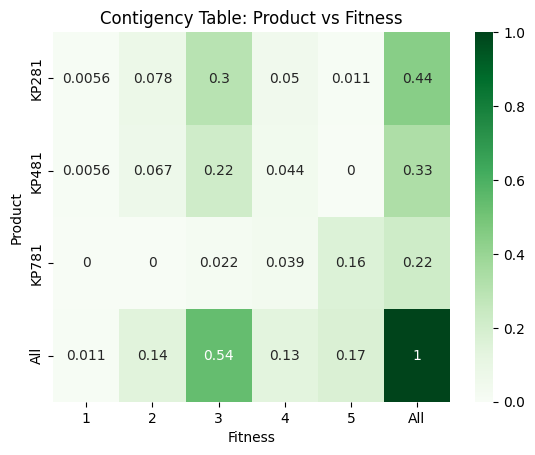

In [ ]:
contigency_table_fitness = pd.crosstab(index=df['Product'],columns=df['Fitness'],margins=True,normalize=True)
sns.heatmap(contigency_table_fitness,annot=True,cmap='Greens')
plt.title('Contigency Table: Product vs Fitness')
plt.show()

In [ ]:
#Conditional probability : P(KP781|Fitness=5)
round((0.16/0.17)*100,2)

94.12

In [ ]:
#Conditional probability : P(KP281|Fitness=5)
round((0.011/0.17)*100,2)

6.47

In [ ]:
#Conditional probability : P(KP281|Fitness=3)
round((0.3/0.54)*100,2)

55.56

In [ ]:
#Conditional probability : P(KP481|Fitness=3)
round((0.22/0.54)*100,2)

40.74

In [ ]:
#Conditional probability : P(KP781|Fitness=3)
round((0.022/0.54)*100,2)

4.07

#Correlation between different factors

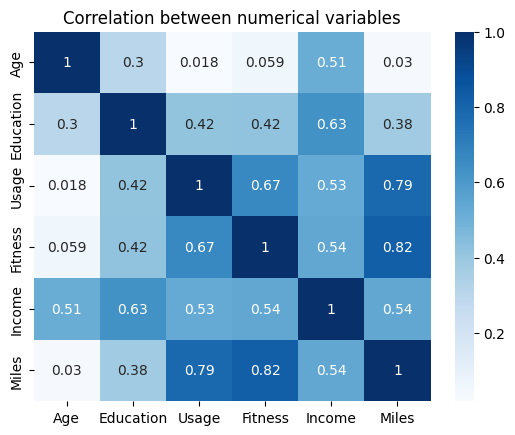

In [ ]:
sns.heatmap(df.corr(numeric_only = True), annot=True,cmap='Blues')
plt.title('Correlation between numerical variables')
plt.show()

<Figure size 500x500 with 0 Axes>

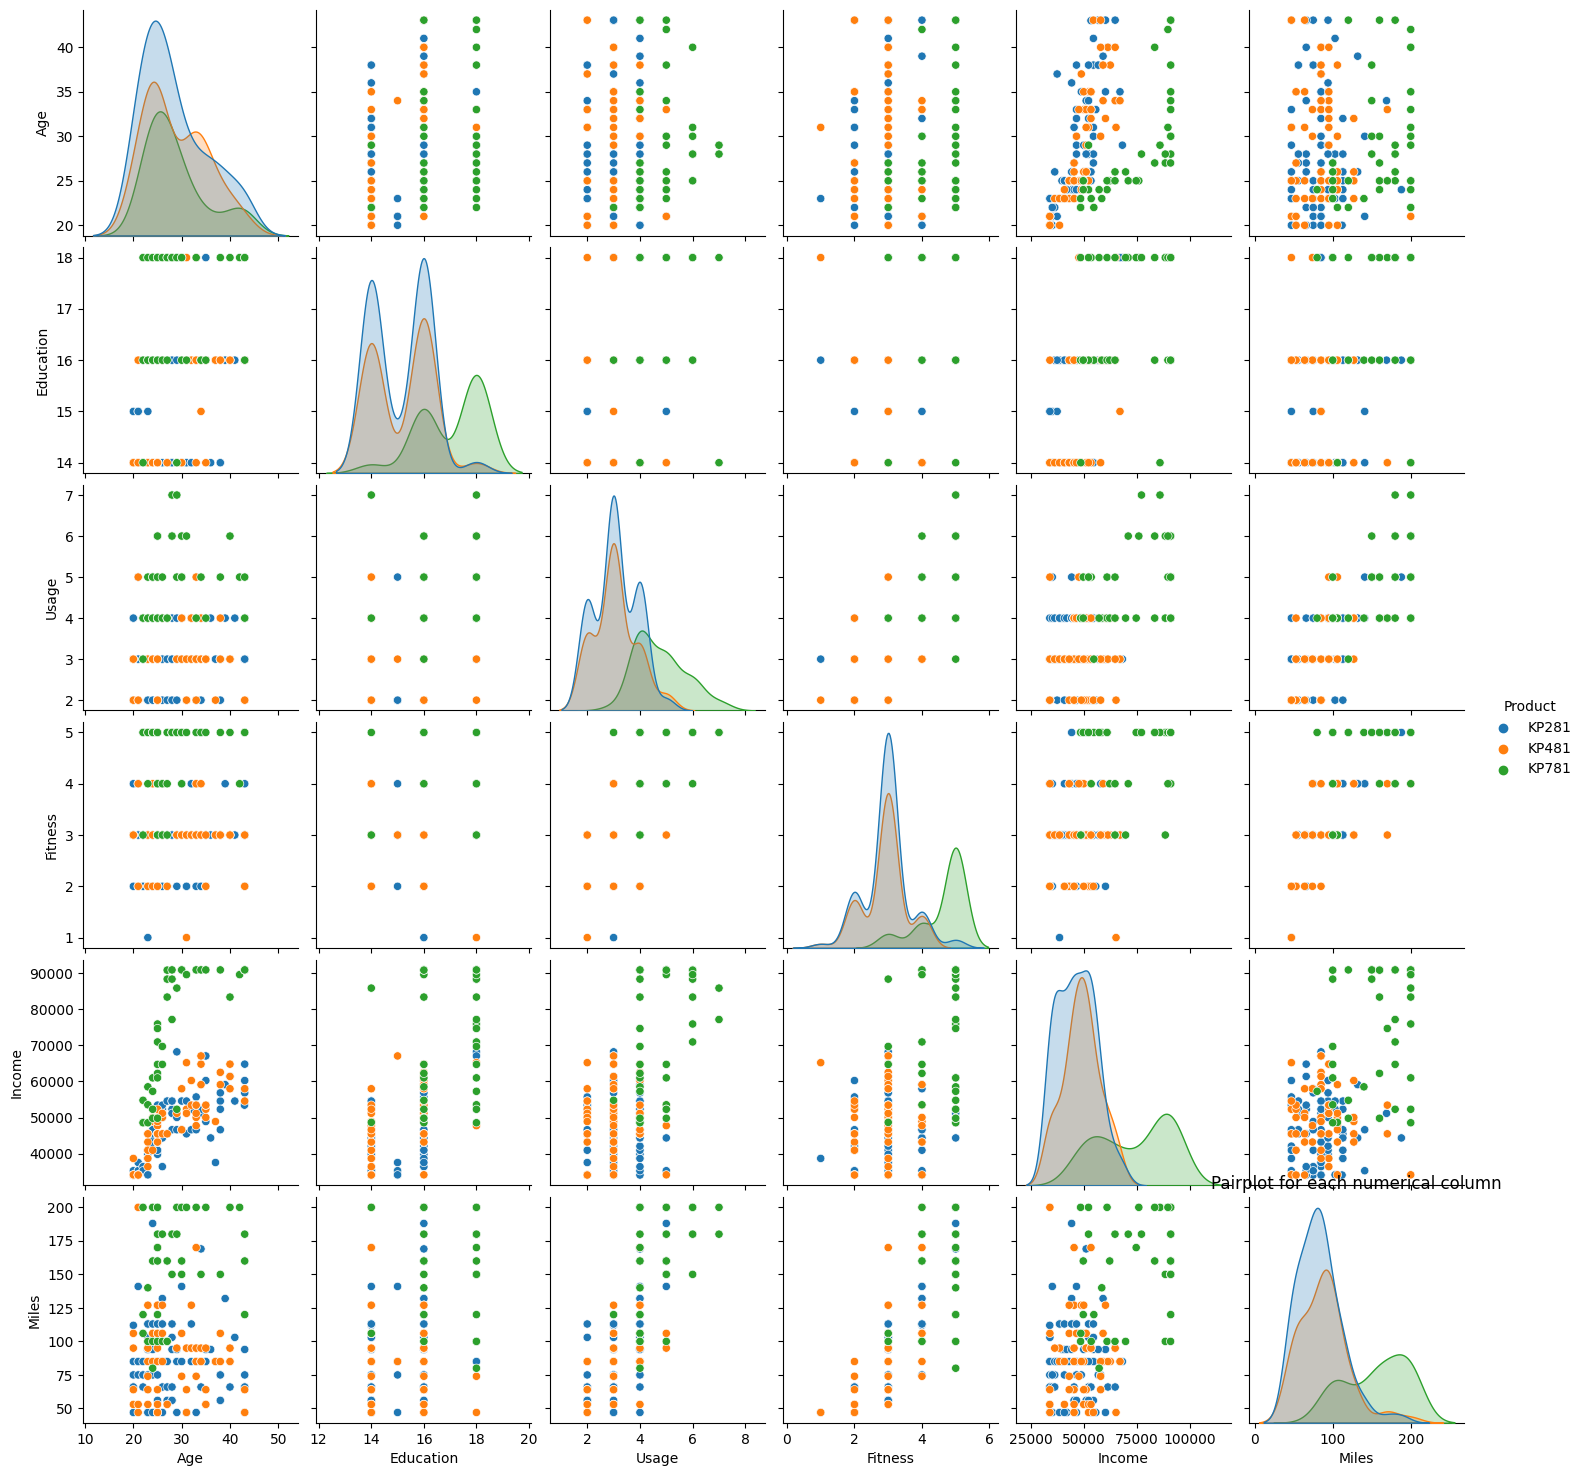

In [ ]:
plt.figure(figsize=(5,5))
sns.pairplot(data=df,hue='Product')
plt.title('Pairplot for each numerical column')
plt.show()

In [ ]:
norm.ppf(0.96, 65, 2.5)

69.37671517813042

In [ ]:
norm.ppf(0.97,1000, 200)

1376.15872163025

#Customer profiling and recommendation

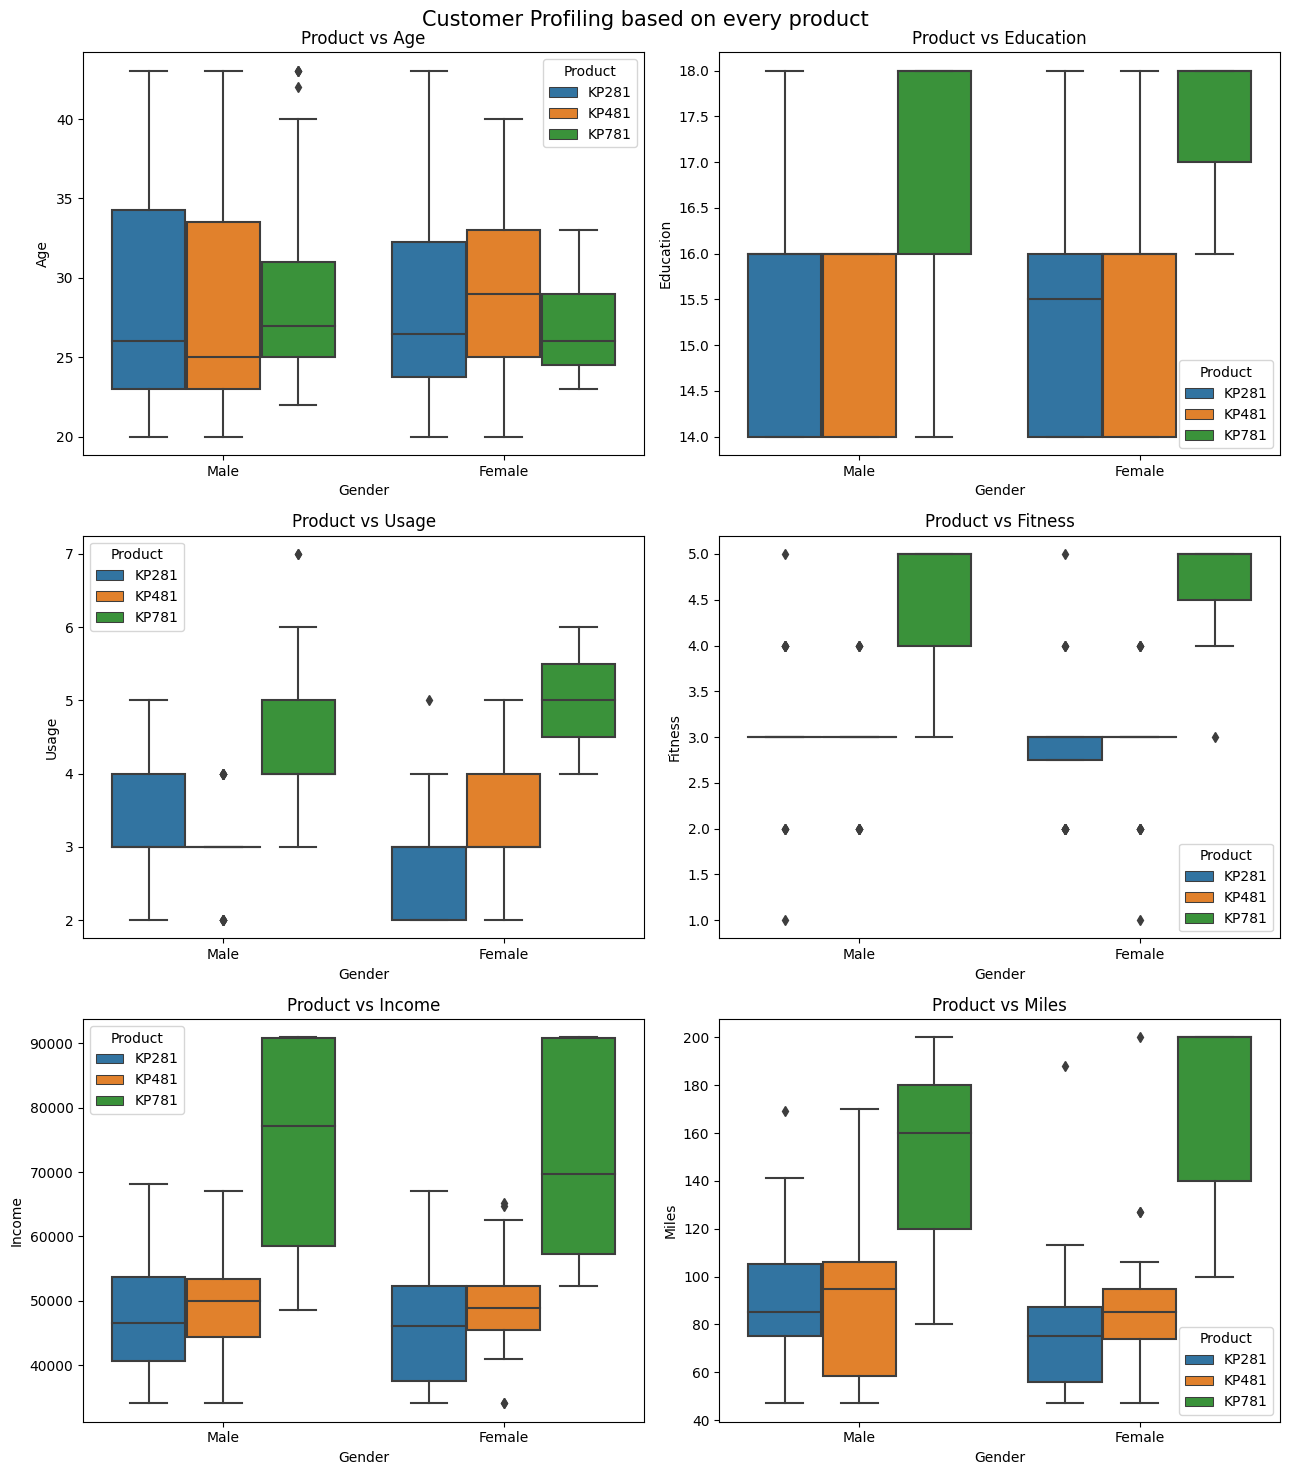

In [ ]:
fig,axes=plt.subplots(3,2,figsize=(13,15))
plt.suptitle('Customer Profiling based on every product',fontsize=15)
axes = axes.flatten()

for i, columns in enumerate(continuous_columns):
  sns.boxplot(y=df[columns],x=df['Gender'],ax=axes[i],hue=df['Product'])
  axes[i].set_title(f'Product vs {columns.capitalize()}')

plt.tight_layout()
plt.show()

Insights:

* Based on the above analysis, probability of purchase of KP281 is 44, probability of purchase of KP481 is 33%.
* Customer prodile for kP281 -  Age of customer mainly between 18 to 35 years with 30 few between 35 to 50 years - Education level of customer 13 years and above - Annual Income of customer below USD 60,000 - Weekly Usage - 2 to 4 times - Fitness Scale - 2 to 4 - Weekly Running Mileage - 50 to miles.
*Customer Profile for KP481 Treadmill: - Age of customer mainly between 18 to 35 years with few between 35 to 50 years - Education level of customer 13 years and above - Annual Income of customer between USD 40,000 to USD 80,000 - Weekly Usage - 2 to 4 times - Fitness Scale - 2 to 4 - Weekly Running Mileage to 200 miles.
* Customer Profile f or KP781 Treadmill: - Gender Male - Age of customer between 18 to 35 years - Education level of customer 15 years and above
Annual Income of customer USD 80,000 and above - Weekly Usage - 4 to 7 times - Fitness Scale 3 to 5 - Weekly Running Mil effectiveness

##Recommendations

1) Marketing Strategy: Focus on targeting customers with higher fitness levels by promoting the
benefits of using fitness equipment regularly. Emphasize how regular usage can contribute to
improving fitness and overall health.

2) Product Development: Consider developing treadmill models that offer longer mileage for
customers with higher incomes. This can cater to their preference for treadmills that allow
them to cover more distance and potentially attract this customer segment. Use the data on
product preferences and conditional probabilities to guide product development. If KP281
is popular among certain groups, consider enhancing its features or affordability for wider
appeal. For KP781, explore ways to cater to higher-income customers’ fitness needs.

3) Pricing Strategy: Adjust pricing strategies accordingly based on the income levels of the
target customer segment. Higher-income individuals may be willing to pay more for advanced
treadmill features and better overall quality.

4) Education Campaign: Develop educational content to promote the link between education,
income, and fitness. Highlight how higher education levels can lead to higher incomes and a
greater likelihood of engaging in fitness activities. Show how using treadmills can be a part
31
of an overall active and healthy lifestyle.

5)  Customer Segmentation: Segment the customer base based on their activity lifestyles, income
levels, and education levels. This will help tailor marketing messages and product offerings
to each segment’s specific needs and preferences.

6) Partnerships: Collaborate with fitness influencers or organizations that target customers with
higher fitness levels or higher incomes. This can help to expand brand reach and credibility
among the target audience.
